In [5]:
import json
import yaml
import os
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, HTML
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))
import seaborn as sns
import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [6]:
def prepare_plot_data(plot_data, dataset, query_class_names, num_new_udfs, question_ids, run_ids, vocal_udf_config_name):
    # Define LLM models, tasks, number of new UDFs, and hatch patterns
    selection_methods = ['All', 'No Active Learning', 'No Dummy UDF']

    # hatch_patterns = ['...', '///', '\\\\\\', 'xxx', '***', '+++', '|||', '---', 'ooo']
    # handles_f1 = []

    # Create a figure and axis for the boxplot
    # fig, ax = plt.subplots(1, 1, figsize=(3, 2))  # Adjust the figsize as needed

    # Iterate through LLM models
    for i, selection_method in enumerate(selection_methods):
        print(f"######## {selection_method} ########")

        # Iterate through tasks
        for task_id in num_new_udfs:
            task = f"{task_id}_new_udfs"
            failed_list = []

            # Iterate through runs and questions
            for query_class_name in query_class_names:
                for run_id in run_ids:
                    for question_id in question_ids:
                        try:
                            if selection_method == 'All':
                                config_name = vocal_udf_config_name
                            elif selection_method == 'No Active Learning':
                                config_name = f"random_{vocal_udf_config_name}"
                            elif selection_method == 'No Dummy UDF':
                                config_name = f"no_dummy_{vocal_udf_config_name}"
                            with open(os.path.join(config['log_dir'], "query_execution", dataset, query_class_name, f"num_missing_udfs={task_id}", config_name, f"qid={question_id}-run={run_id}.log"), "r") as f:
                                lines = f.readlines()
                            f1_score = -1
                            for line in lines:
                                if "F1 score:" in line:
                                    f1_score_pattern = r"F1 score: ([0-9.]+)"
                                    match = re.search(f1_score_pattern, line)
                                    f1_score = float(match.group(1))
                                    failed_list.append(0)
                                    break
                            if f1_score == -1:
                                print(f"failed task: dataset={dataset}, task_id={task_id}, query_class_name={query_class_name}, question_id={question_id}, run_id={run_id}")
                                failed_list.append(1)
                                f1_score = 0
                            # dataset, query_class_names, num_new_udfs, question_ids, run_ids, f1_score
                            plot_data.append([selection_method, dataset, query_class_name, task_id, question_id, run_id, f1_score])
                        except Exception as e:
                            print(e)
                            continue

In [7]:
plot_data = [] # selection_method, dataset, query_class_names, num_new_udfs, question_ids, run_ids, f1_score

# CityFlow
dataset = "cityflow"
query_class_names = [
    "unavailable_pred=1-unavailable_attr_pred=1-npred=1-nattr_pred=2-nvars=3-depth=3-max_duration=15-min_npos=74-max_npos=737",
    "unavailable_pred=1-unavailable_attr_pred=1-npred=2-nattr_pred=2-nvars=3-depth=3-max_duration=15-min_npos=74-max_npos=737"
]
question_ids = list(range(15))
# question_ids = list(range(10))
# run_ids = list(range(3))
run_ids = list(range(1))
num_new_udfs = [2]
vocal_udf_config_name = "ninterp=10-nparams=5-kwargs=True-pixels=False-pretrained_models=False-ntrain_distill=500-nselection_samples=500-selection=both-labels=user-budget=50-llm_method=gpt4v"
prepare_plot_data(plot_data, dataset, query_class_names, num_new_udfs, question_ids, run_ids, vocal_udf_config_name)

# CLEVRER
dataset = "clevrer"
query_class_names = [
    "3_new_udfs_labels",
]
question_ids = list(range(30))
# question_ids = list(range(10))
# run_ids = list(range(3))
run_ids = list(range(1))
num_new_udfs = [3]
vocal_udf_config_name = "ninterp=10-nparams=5-kwargs=True-pixels=True-pretrained_models=False-ntrain_distill=100-nselection_samples=500-selection=both-labels=user-budget=20-llm_method=gpt4v"
prepare_plot_data(plot_data, dataset, query_class_names, num_new_udfs, question_ids, run_ids, vocal_udf_config_name)

# Charades
dataset = "charades"
query_class_names = [
    "unavailable=2-npred=4-nobj_pred=1-nvars=3-depth=2",
    "unavailable=2-npred=4-nobj_pred=1-nvars=2-depth=2",
    "unavailable=2-npred=3-nobj_pred=1-nvars=2-depth=2"
]
question_ids = list(range(10))
run_ids = list(range(1))
# run_ids = list(range(3))
num_new_udfs = [2]
vocal_udf_config_name = "ninterp=10-nparams=5-kwargs=True-pixels=False-pretrained_models=False-ntrain_distill=500-nselection_samples=500-selection=both-labels=user-budget=50-llm_method=gpt4v"
prepare_plot_data(plot_data, dataset, query_class_names, num_new_udfs, question_ids, run_ids, vocal_udf_config_name)

plot_df = pd.DataFrame(plot_data, columns=["selection_method", "dataset", "query_class_name", "num_new_udfs", "question_id", "run_id", "f1_score"])

######## All ########
######## No Active Learning ########
######## No Dummy UDF ########
######## All ########
######## No Active Learning ########
######## No Dummy UDF ########
######## All ########
######## No Active Learning ########
######## No Dummy UDF ########


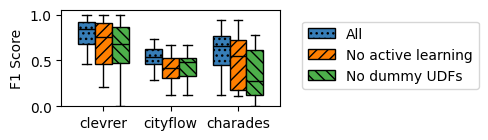

In [8]:
def plot(plot_df):
    hatch_patterns = ['...', '///', '\\\\\\', 'xxx', '***', '+++', '|||', '---', 'ooo']
    # selection_methods = ['All', 'No Active Learning']
    selection_methods = ['All', 'No Active Learning', 'No Dummy UDF']
    selection_method_labels = ['All', 'No active learning', 'No dummy UDFs']
    num_selection_methods = len(selection_methods)
    datasets = ['clevrer', 'cityflow', 'charades']
    # dataset_labels = ['CLEVRER', 'CityFlow-NL', 'Charades']
    num_datasets = len(datasets)
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(3, 1.5))
    handles = []
    # Create a boxplot
    for i, selection_method in enumerate(selection_methods):
        group = plot_df[plot_df['selection_method'] == selection_method]
        bp_f1 = ax.boxplot(
            [group[group['dataset'] == d]['f1_score'] for d in datasets],
            positions=np.array(range(num_datasets)) * (num_selection_methods + 1) + i,
            sym='.',
            widths=1,
            showfliers=False,
            patch_artist=True,
            boxprops=dict(facecolor=CB_color_cycle[i], hatch=hatch_patterns[i]),
            medianprops=dict(color='black'))
        handles.append(bp_f1["boxes"][0])

    # Customize the plot labels and legend
    # ax.set_title(f"question_ids: {question_ids}")
    ax.set(ylabel="F1 Score")
    # ax.set(xlabel="# new UDFs")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xlim(left=-1.5, right=num_datasets * (num_selection_methods + 1) - 0.5)
    ax.set_xticks(np.arange(num_selection_methods / 2 - 0.5, num_datasets * num_selection_methods + num_selection_methods / 2 + 1, num_selection_methods + 1))
    ax.set_xticklabels(datasets)
    # fig.legend(handles, selection_methods, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, prop={"size": 10}, fancybox=True, shadow=False) # On the top
    fig.legend(handles, selection_method_labels, loc='center left', bbox_to_anchor=(1, 0.6), ncol=1, prop={"size": 10}, fancybox=True, shadow=False) # On the right
    fig.tight_layout()
    fig.savefig(f"figures/ablation_udf_selection.pdf", bbox_inches='tight')

    plt.show()

plot(plot_df)